In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r"./winequality.csv")
r"./diabetes.csv"

### Exploratory Data Analysis & Preprocessing

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
df.shape

(1599, 12)

In [12]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


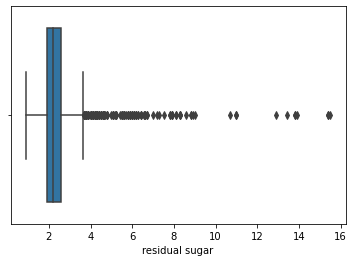

In [21]:
sns.boxplot(df["residual sugar"])

In [24]:
#Eliminating outliers by using Z-score
from scipy import stats
z = np.abs(stats.zscore(df))
df = df[(z < 3).all(axis=1)]
df.shape

(1451, 12)

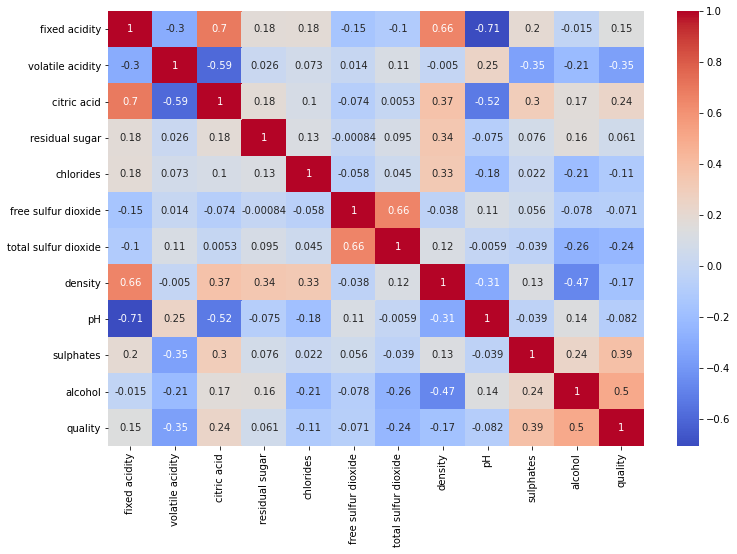

In [26]:
#Correlation
corr = df.corr()
plt.subplots(figsize=(12,8))
sns.heatmap(corr,annot=True, cmap="coolwarm")

In [28]:
#Checking the class imbalance
df["quality"].value_counts()

5    617
6    586
7    185
4     47
8     16
Name: quality, dtype: int64

### Defining the model

In [29]:
X = df.drop("quality", axis=1)
y = df["quality"]

In [31]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)

#### KNN accuracy plot

Text(0, 0.5, 'Cross-validated accuracy')

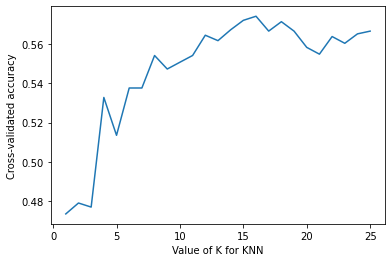

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
k_range = range(1, 26)
k_scores = []
# Calculate cross validation score for every k number from 1 to 25
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)

# It’s 10 fold cross validation with ‘accuracy’ scoring 
    scores = cross_val_score(knn, X, y, cv=10, scoring="accuracy") 
    k_scores.append(scores.mean())

# Plot accuracy for every k number between 1 and 26
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

In [52]:
# Train the model and predict for k=16
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#classification report
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        16
           5       0.64      0.75      0.69       173
           6       0.57      0.57      0.57       184
           7       0.41      0.33      0.37        57
           8       0.00      0.00      0.00         6

    accuracy                           0.58       436
   macro avg       0.32      0.33      0.33       436
weighted avg       0.55      0.58      0.56       436



C:\Users\huso9\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
# Metrics
print("Precision = {}".format(precision_score(y_test, y_pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, y_pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, y_pred)))
print("F1 Score = {}".format(f1_score(y_test, y_pred,average='macro')))

Precision = 0.3241901108269395
Recall = 0.3310861187903158
Accuracy = 0.5825688073394495
F1 Score = 0.3258478770323576


C:\Users\huso9\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
# Train and fit model
logreg = LogisticRegression(multi_class="multinomial",solver ="newton-cg")
logreg.fit(X_train, y_train)
#In order to use it as a multi-class classification algorithm, we used multi_class=’multinomial’, solver =’newton-cg’ parameters.
y_pred = logreg.predict(X_test)

In [55]:
#classification report
print(metrics.classification_report(y_test, y_pred, digits=3, zero_division = 1))

              precision    recall  f1-score   support

           4      1.000     0.000     0.000        16
           5      0.609     0.711     0.656       173
           6      0.556     0.565     0.561       184
           7      0.468     0.386     0.423        57
           8      1.000     0.000     0.000         6

    accuracy                          0.571       436
   macro avg      0.727     0.332     0.328       436
weighted avg      0.588     0.571     0.552       436



In [56]:
# Metrics
print("Precision = {}".format(precision_score(y_test, y_pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, y_pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, y_pred)))
print("F1 Score = {}".format(f1_score(y_test, y_pred,average='macro')))

Precision = 0.3266291460184817
Recall = 0.3324329925089174
Accuracy = 0.5711009174311926
F1 Score = 0.32794476466929295


C:\Users\huso9\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [59]:
# Classification report
print(metrics.classification_report(y_test, y_pred.round(), digits=3))

              precision    recall  f1-score   support

           4      0.125     0.125     0.125        16
           5      0.672     0.711     0.691       173
           6      0.651     0.587     0.617       184
           7      0.456     0.544     0.496        57
           8      0.333     0.167     0.222         6

    accuracy                          0.608       436
   macro avg      0.447     0.427     0.430       436
weighted avg      0.610     0.608     0.607       436



In [60]:
# Metrics
print("Precision = {}".format(precision_score(y_test, y_pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, y_pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, y_pred)))
print("F1 Score = {}".format(f1_score(y_test, y_pred,average='macro')))

Precision = 0.44738984869080956
Recall = 0.4266930992976283
Accuracy = 0.6077981651376146
F1 Score = 0.43027526306402714


### Conclusion

In [62]:
print("KNN Accuracy =0.58256")
print("Logistic Regression Accuracy =0.57110")
print("Decision Tree Accuracy =0.60779")

KNN Accuracy =0.58256
Logistic Regression Accuracy =0.57110
Decision Tree Accuracy =0.60779


In [63]:
#We should choose decision tree algorithm because of the higher Accuracy Score 